
# PROJECT TITLE: AVOCADO PRICE ANALYSIS AND PREDICTION 

## NAME: ROHIT PARMAR
    
## RUID: 183008679

# Problem Statement

To analyse, predict and forecast the average price of Avocado in the future year which would help the buyers to buy different types of Avocado

# Information 

Mexico supplies 37% of the international avocado market.(FAOSTAT. Retrieved 2018-08-23)

Of the 57 avocado producing countries, the other major producers are Dominican Republic, Peru, Colombia, and Indonesia in that order. (Statista)

USA is placed at 10th in this list, with 2.4% of the world total production.(FAOSTAT. Retrieved 2018-08-23)

Most of the avocados in the United States come from California (followed by Florida and Hawaii) or Mexico. (NASS)

The value of USA avocado production measured $392 million in 2017. The United States produced 146,310 tons. (NASS, 2018)

The United States is a net importer of avocados from Mexico. Mexico supplied most of the avocados imported into the United States in 2017. 

In 2017, the United States imported $2.6 billion in fresh avocados and exported approximately $28,500 (ERS 2018)

# Importing Libraries

In [1]:
#libraries required for data analysis 
import numpy as np
import pandas as pd
import datetime

#libraries required for data visualization 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm # this library will be used for ARIMA and time series analysis
import itertools
from pylab import rcParams # will be used to create time series graph

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.api as sm # this library will be used for ARIMA and time series analysis
import itertools
from pylab import rcParams # will be used to create time series graph



# Data PreProcessing

In [2]:
#read_csv is a function in pandas used to read data from an csv file into a list of DataFrames
avo_data = pd.read_csv('/Users/rohitparmar/Desktop/RBS docs/Capstone Project/avocado.csv') 
#Drop the useless column
avo_data = avo_data.drop(['Unnamed: 0'], axis = 1) 
#get new column names
names = ["Date", "Averageprice", "Totalvol", "Small Hass","Large Hass","Xlarge Hass","Totalbags","Smallbags","Largebags","Xlargebags","Type","Year","Region"] 
avo_data = avo_data.rename(columns=dict(zip(avo_data.columns, names))) #renaming the columns
avo_data.head()

,Date,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avo_data.shape #data has 13 coulumns and 18249 rows

(18249, 13)

# Some Important Facts about the Dataset

The table above represents weekly 2018 retail scan data for National retail volume (units) and price

Weekly 2018 retail scan data for National retail volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

Other varieties of avocados (e.g. greenskins) are not included in this table.


# Relevant columns in the dataset:

Date - The date of the observation

Averageprice - the average price of a single avocado

Type - conventional or organic

Year - the year

Region - the city or region of the observation

Totalvol - Total number of avocados sold

Small Hass - Total number of avocados with PLU 4046 sold

Large Hass - Total number of avocados with PLU 4225 sold

XLarge Hass - Total number of avocados with PLU 4770 sold

### Is there any NULL variable in the Dataset?

In [4]:
avo_data.isnull().sum() 

Date            0
Averageprice    0
Totalvol        0
Small Hass      0
Large Hass      0
Xlarge Hass     0
Totalbags       0
Smallbags       0
Largebags       0
Xlargebags      0
Type            0
Year            0
Region          0
dtype: int64

In [5]:
avo_data.describe().round(2)

,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [6]:
avo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
Averageprice    18249 non-null float64
Totalvol        18249 non-null float64
Small Hass      18249 non-null float64
Large Hass      18249 non-null float64
Xlarge Hass     18249 non-null float64
Totalbags       18249 non-null float64
Smallbags       18249 non-null float64
Largebags       18249 non-null float64
Xlargebags      18249 non-null float64
Type            18249 non-null object
Year            18249 non-null int64
Region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### To summarise the dataset we see:

**13 columns (variables) and 18249 rows (observations)**

**There isn't any NULL variable**

**data types: float64(9), int64(1), object(3)**

**There are some unnamed/undefined columns**

**'Region','Type' and 'Date' columns are in object format**

# Initializing the Design

**What is the Average price of Avocado in the last 4 years?**

In [7]:
avo_data['Averageprice'].mean()

1.4059784097758825

 **What is the minimum Price of Avocado in last 4 years?**

In [8]:
avo_data['Averageprice'].min()

0.44

**What is the maximum Price of Avocado in last 4 years?**

In [9]:
avo_data['Averageprice'].max()

3.25

**How many people made the purchase of Organic and Conventional in last 4 years?**

In [10]:
avo_data['Type'].value_counts() # Counts the number of Avocados based on the type

conventional    9126
organic         9123
Name: Type, dtype: int64

**What was the average volume of Avocado per year? (2015-2018) ?**

In [11]:
avo_data.groupby('Year')['Totalvol'].mean()

Year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Totalvol, dtype: float64

**Finding the Average Price of Avocado in the different region in last 4 years**

In [12]:
avo_data.groupby('Region')['Averageprice'].mean()

Region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

**Which year Avacodo costed more than average in what region and diff PLU(Price look-up codes)**

In [13]:
avo_data[avo_data['Averageprice'] > avo_data['Averageprice'].mean()][['Averageprice','Year','Region','Type','Small Hass','Large Hass','Xlarge Hass']]

,Averageprice,Year,Region,Type,Small Hass,Large Hass,Xlarge Hass
21,1.45,2015,Albany,conventional,509.94,62035.06,741.08
32,1.43,2015,Albany,conventional,1150.55,81955.16,94.32
274,1.54,2015,BuffaloRochester,conventional,1445.25,39831.66,88.61
275,1.59,2015,BuffaloRochester,conventional,1572.71,48468.73,134.33
276,1.56,2015,BuffaloRochester,conventional,1471.69,49388.48,173.32
278,1.49,2015,BuffaloRochester,conventional,1287.09,43655.31,170.47
279,1.50,2015,BuffaloRochester,conventional,1230.78,45937.58,258.00
280,1.47,2015,BuffaloRochester,conventional,1139.74,56289.28,349.19
281,1.47,2015,BuffaloRochester,conventional,1447.81,44620.70,471.55
284,1.45,2015,BuffaloRochester,conventional,1119.38,47294.67,4714.73


**What is the Average price of Organic Avocado in last years and which region does it belong to?**

In [14]:
organic = avo_data[avo_data['Type'] == 'organic'] #Taking Subset of data from complete dataset 
organic

,Date,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Type,Year,Region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.00,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.00,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.00,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.00,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.00,organic,2015,Albany
9131,2015-11-22,1.94,858.83,13.84,84.18,0.00,760.81,755.69,5.12,0.00,organic,2015,Albany
9132,2015-11-15,1.89,1208.54,20.71,238.16,0.00,949.67,949.67,0.00,0.00,organic,2015,Albany
9133,2015-11-08,1.88,1332.27,20.08,351.40,0.00,960.79,960.79,0.00,0.00,organic,2015,Albany
9134,2015-11-01,1.88,1021.68,11.47,137.58,0.00,872.63,872.63,0.00,0.00,organic,2015,Albany
9135,2015-10-25,1.83,1161.90,49.27,148.96,0.00,963.67,963.67,0.00,0.00,organic,2015,Albany


**Finding the average Organic Avocado cost per year**

In [15]:
organic.groupby('Year')['Averageprice'].mean()

Year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: Averageprice, dtype: float64

**Finding the list of average Organic Avacado cost in different regions in the last 4 years**

In [16]:
organic.groupby('Region')['Averageprice'].mean().sort_values(ascending=False)

Region
HartfordSpringfield    2.229231
SanFrancisco           2.211243
NewYork                2.053018
Sacramento             1.969172
Charlotte              1.936982
RaleighGreensboro      1.883136
Philadelphia           1.867929
Northeast              1.859408
Jacksonville           1.828284
Orlando                1.797988
Spokane                1.775207
Albany                 1.773314
HarrisburgScranton     1.767751
Boston                 1.757396
LasVegas               1.748876
Chicago                1.744201
SanDiego               1.734852
BaltimoreWashington    1.724260
PhoenixTucson          1.720651
Seattle                1.715385
Plains                 1.707515
NorthernNewEngland     1.694556
WestTexNewMexico       1.688855
California             1.685207
GrandRapids            1.684970
StLouis                1.675503
SouthCarolina          1.660355
Syracuse               1.653728
BuffaloRochester       1.651361
Southeast              1.633018
Boise                  1.620237
T

**What is the Average price of Conventional Avocado in last years and  which region does it belong to?**

In [17]:
conventional = avo_data[avo_data['Type'] == 'conventional']
conventional

,Date,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


**What is the average Conventional Avacado cost in last 4 years**

In [18]:
conventional.groupby('Year')['Averageprice'].mean()

Year
2015    1.077963
2016    1.105595
2017    1.294888
2018    1.127886
Name: Averageprice, dtype: float64

**Finding the list of average Conventional Avocado cost in different regions in last 4 years**

In [19]:
conventional.groupby('Region')['Averageprice'].mean().sort_values(ascending=False)

Region
HartfordSpringfield    1.408047
NewYork                1.402130
SanFrancisco           1.397160
Philadelphia           1.396331
Syracuse               1.386923
BuffaloRochester       1.382308
Chicago                1.369349
Albany                 1.348757
Northeast              1.344438
BaltimoreWashington    1.344201
GrandRapids            1.325030
Boston                 1.304379
Charlotte              1.275089
Sacramento             1.273964
NorthernNewEngland     1.260237
HarrisburgScranton     1.258817
MiamiFtLauderdale      1.254320
Pittsburgh             1.250651
RaleighGreensboro      1.227101
Orlando                1.214438
Midsouth               1.207160
Tampa                  1.201598
Jacksonville           1.193609
StLouis                1.185740
GreatLakes             1.181893
Seattle                1.169763
Plains                 1.165503
Southeast              1.163018
SouthCarolina          1.146213
Indianapolis           1.144852
Detroit                1.123964
R

**Find sales by regions and later build it by year**

In [20]:
avo_data.groupby('Region')['Totalvol'].mean().sort_values()

Region
Syracuse               3.237476e+04
Boise                  4.264257e+04
Spokane                4.605111e+04
Albany                 4.753787e+04
Louisville             4.762427e+04
Pittsburgh             5.564008e+04
BuffaloRochester       6.793630e+04
Roanoke                7.408879e+04
Jacksonville           8.517753e+04
Columbus               8.873776e+04
GrandRapids            8.938383e+04
Indianapolis           8.953666e+04
StLouis                9.489004e+04
Charlotte              1.051939e+05
Nashville              1.053612e+05
HarrisburgScranton     1.236948e+05
RichmondNorfolk        1.249433e+05
CincinnatiDayton       1.317219e+05
NewOrleansMobile       1.351927e+05
RaleighGreensboro      1.426116e+05
HartfordSpringfield    1.499128e+05
LasVegas               1.608784e+05
Orlando                1.735524e+05
SouthCarolina          1.797449e+05
Detroit                1.876403e+05
Tampa                  1.952797e+05
NorthernNewEngland     2.116358e+05
Philadelphia         

**Counting the number of organic and conventional Avocado sold int the last 4 years.**

In [21]:
avo_data.groupby('Year')['Type'].value_counts()

Year  Type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: Type, dtype: int64

# Insights and  Visualizations


## Weight Distribution of Prices

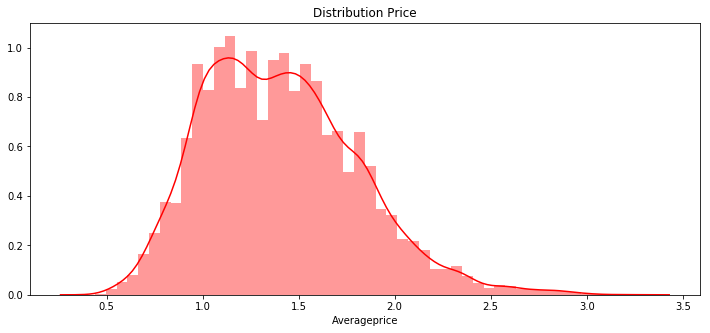

In [22]:
plt.figure(figsize=(12,5))# set the size of the figure
plt.title("Distribution Price") # setting the title
ax = sns.distplot(avo_data["Averageprice"], color = 'r')# plotting the distribution

As you can see the weight is in the price range of $1.15

## **Average Price In General**

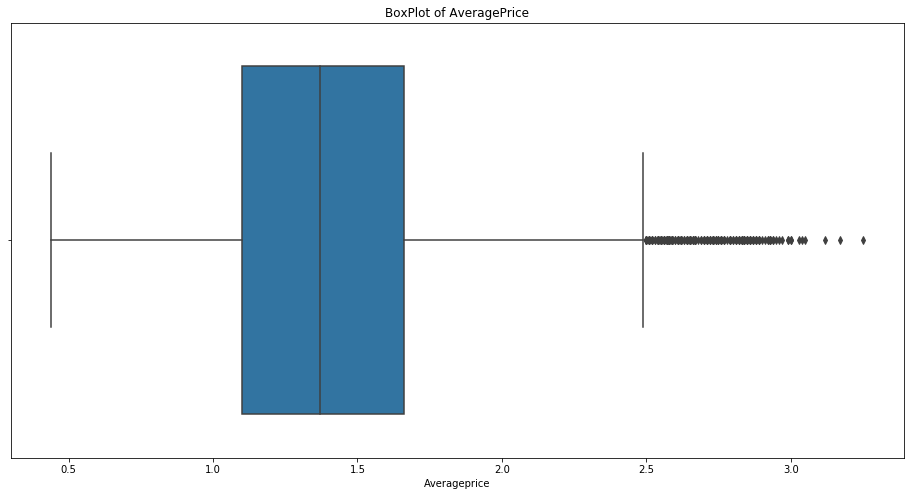

In [23]:
# set the size of the figure
plt.figure(figsize=(16,8))
# set the title
plt.title("BoxPlot of AveragePrice")
# plot the boxplot
ax = sns.boxplot(avo_data["Averageprice"])

The median lies between 1 to 1.5 as it takes the average price of both conventional as well organic Avocados which are a bit more expensive

## **Price Distribution Graph**

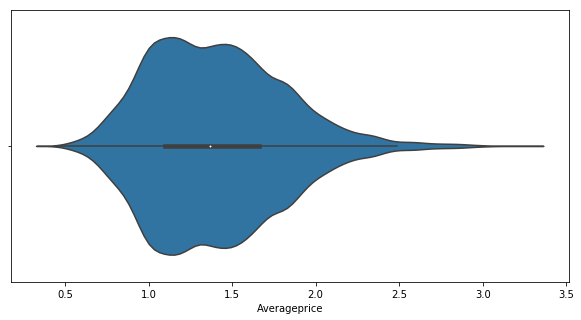

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(avo_data.dropna(subset = ['Averageprice']).Averageprice)

## **Change of Average Price Per Calendar Year**

**Yearly Price Distribution is very important as Seasonality may play a very important role in the varying prices.**

Text(0.5, 1.0, 'Average Price')

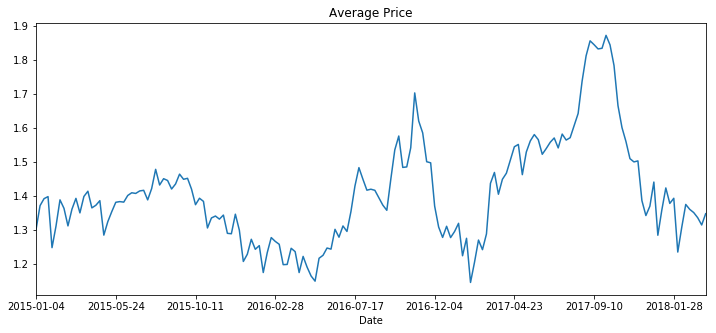

In [25]:
dategroup=avo_data.groupby('Date').mean() #Grouping the data by Date using goupby function
plt.figure(figsize=(12,5))
dategroup['Averageprice'].plot(x=avo_data.Date)
plt.title('Average Price')

## **Plotting the Average Price of Avocado depending upon It's Type**

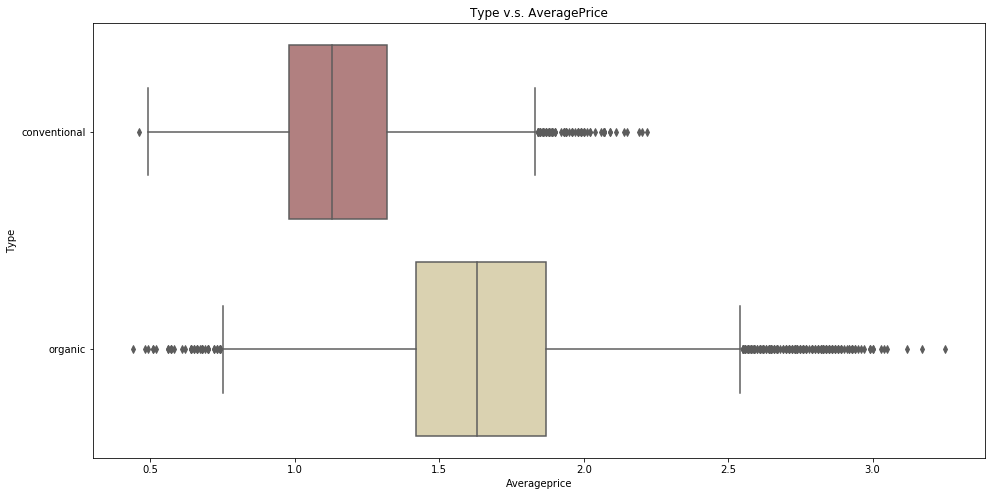

In [26]:
# set the size of the figure
plt.figure(figsize=(16,8))
# set the title
plt.title("Type v.s. AveragePrice")
# plot Type v.s. AveragePrice
ax = sns.boxplot(y="Type", x="Averageprice", data=avo_data, palette = 'pink')

The average price of Conventional type is a bit less as compared to the Organic type. 

As you can see from the above Box-Whisker Plot Organic type has a median price ranging between 1.5 to 2.0 whereas the conventional ones lie between 1.0 to 1.5

## **Yearly Average Price in Each Region**

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

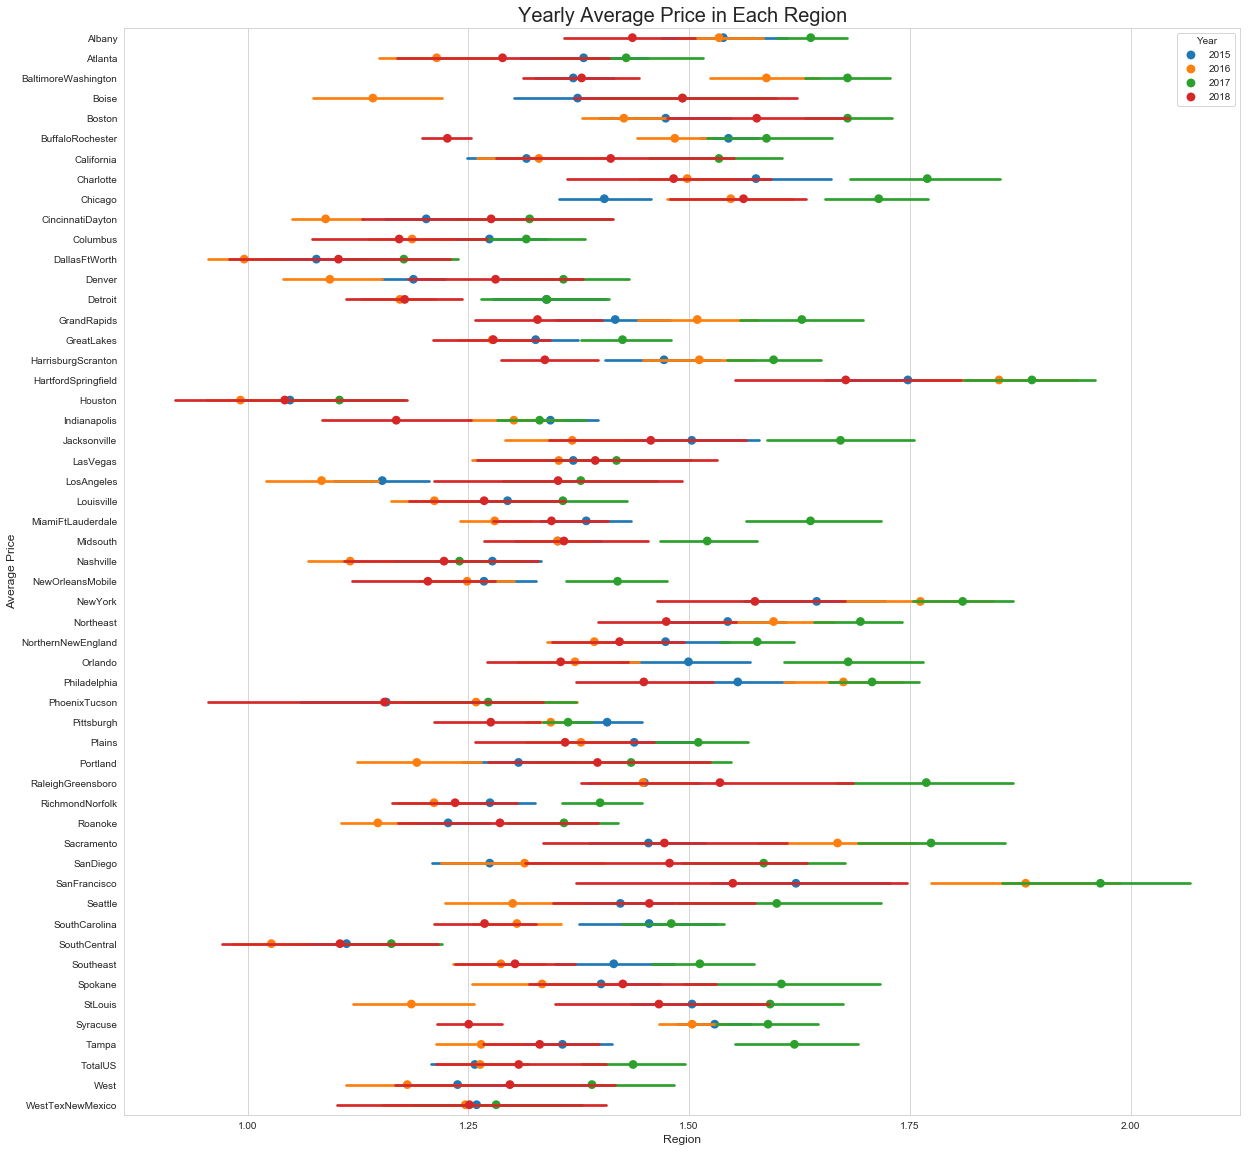

In [27]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='Averageprice',y='Region',data=avo_data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

The price of Avocados are pretty much higher in 2017 as compared to the previous years.

The highest is in San Francisco in 2017 followed by Hattford Springfield as depicted in the above graph.

The lowest is in the Region Houston in 2018 followed by DallasFtWorth which has almost the same price.

## **Type Average Price in Each Region**

Text(0.5, 1.0, 'Type Average Price in Each Region')

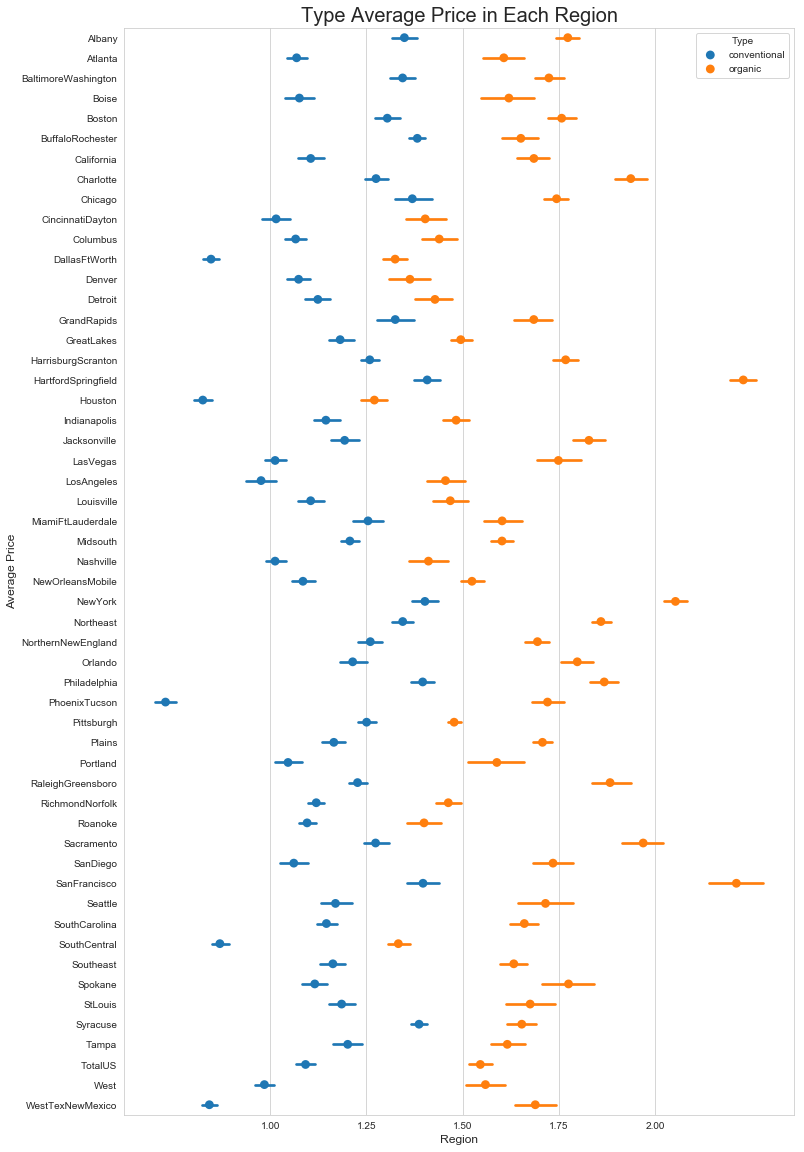

In [28]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='Averageprice',y='Region',data=avo_data, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

By the above visualizations we can say that Organic avocados are more expensive than the Conventional ones as  their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them. 

In 2017, organic avocados were very expensive as shown in the graph!

Avocado is generally more expensive with each passing year.

The Organic Avocado has the highest Average price of approximately 2.50 USD in the San Francisco Region.

The Conventional Avocados lies in the price range of 1.25 to 1.50 USD for most of the Regions.



## **Type Distribution in the Dataset**

conventional    9126
organic         9123
Name: Type, dtype: int64


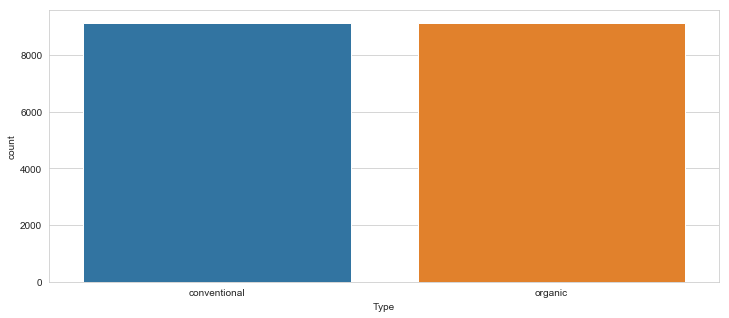

In [29]:
print(avo_data['Type'].value_counts()) #Count the Avocado based on it's type
plt.figure(figsize=(12,5))
sns.countplot(avo_data['Type'])
plt.show()

Almost same number of both the type of Avocados are present in the dataset

## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables.

Each cell in the table shows the correlation between two variables. 

A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

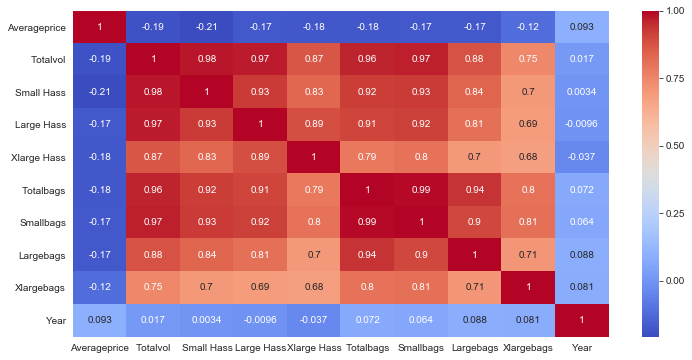

In [30]:
df=avo_data.copy() #Creating a Dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
#darker = stronger

### There is a high correlation between those pairs:
    
Small hass & total volume  (0.98)      

Total bags & total volume  (0.96)      

Small bags & total bags    (0.99)      


Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.

Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.


## **Volume Distribution Over the Years**

In [31]:

df_V = df.drop(['Averageprice', 'Totalvol', 'Totalbags'], axis = 1).groupby('Year').agg('sum')#dropping the columns and grouping them by year
df_V

,Small Hass,Large Hass,Xlarge Hass,Smallbags,Largebags,Xlargebags
Year,,,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,6.346827e+08,1.320664e+08,5443128.28
2016,1.525123e+09,1.672728e+09,1.598798e+08,1.106494e+09,3.366263e+08,20038284.84
2017,1.652038e+09,1.544735e+09,9.121751e+07,1.222953e+09,3.993390e+08,23997172.34
2018,4.604997e+08,4.077587e+08,2.293259e+07,3.607414e+08,1.235840e+08,7210591.87


Text(0, 0.5, '')

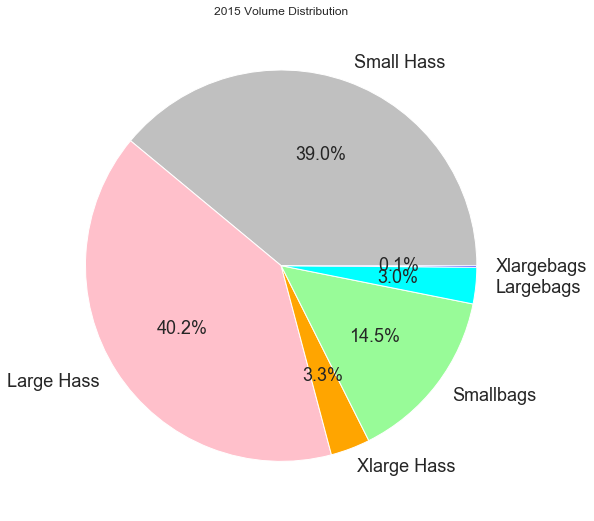

In [32]:
indexes = ['Small Hass', 'Large Hass', 'Xlarge Hass', 'Smallbags', 'Largebags', 'Xlargebags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')


Text(0, 0.5, '')

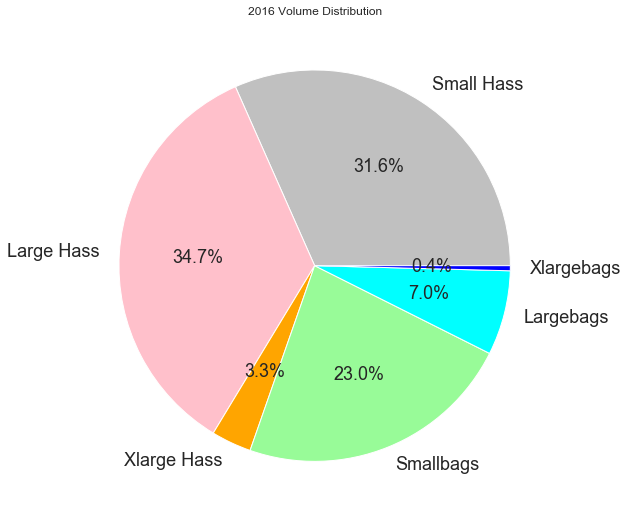

In [33]:
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

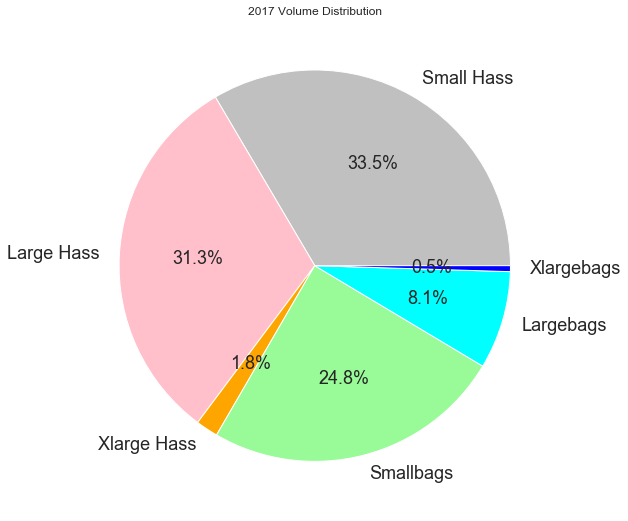

In [34]:
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')


Text(0, 0.5, '')

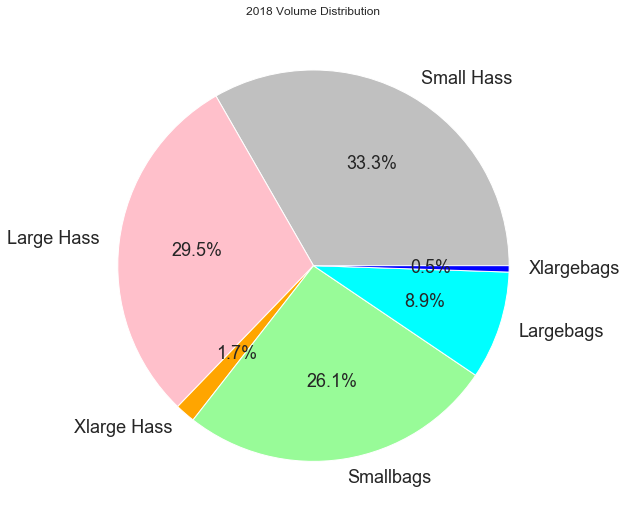

In [35]:
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

The Pie chart shows the Volume Distribution from 2015-2018.

As you can see almost 60% in all the past years has been The Small Hass and Large Hass.

People are a less bit attracted towards the Xlarge Bags and Xlarge Hass.

As compared to the Large Bags and Xlarge Bags, Small bags has the highest distribution among the three.

In [36]:
# Total Bags = Small Bags + Large Bags + XLarge Bags
df = df.drop(['Totalbags'], axis = 1)

In [37]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity dropping the Total Volume column as well.
df = df.drop(['Totalvol'], axis = 1)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
Date            18249 non-null object
Averageprice    18249 non-null float64
Small Hass      18249 non-null float64
Large Hass      18249 non-null float64
Xlarge Hass     18249 non-null float64
Smallbags       18249 non-null float64
Largebags       18249 non-null float64
Xlargebags      18249 non-null float64
Type            18249 non-null object
Year            18249 non-null int64
Region          18249 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 1.5+ MB


In [39]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              Averageprice  Small Hass  Large Hass  Xlarge Hass  Smallbags  Largebags  Xlargebags  \
Averageprice         1.000      -0.208      -0.173       -0.179     -0.175     -0.173      -0.118   
Small Hass          -0.208       1.000       0.926        0.833      0.925      0.839       0.699   
Large Hass          -0.173       0.926       1.000        0.888      0.916      0.810       0.689   
Xlarge Hass         -0.179       0.833       0.888        1.000      0.803      0.698       0.680   
Smallbags           -0.175       0.925       0.916        0.803      1.000      0.903       0.807   
Largebags           -0.173       0.839       0.810        0.698      0.903      1.000       0.711   
Xlargebags          -0.118       0.699       0.689        0.680      0.807      0.711       1.000   
Year                 0.093       0.003      -0.010       -0.037      0.064      0.088       0.081   

               Year  
Averageprice  0.093  
Small Hass    0.003  
Large Hass   -0.010  
Xl

### Standardizing (scaling) the variables

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'Xlargebags']= scaler.fit_transform(df.loc[:,'Small Hass':'Xlargebags']) 
df.head()

,Date,Averageprice,Small Hass,Large Hass,Xlarge Hass,Smallbags,Largebags,Xlargebags,Type,Year,Region
0,2015-12-27,1.33,-0.231,-0.200,-0.212,-0.233,-0.222,-0.176,conventional,2015,Albany
1,2015-12-20,1.35,-0.231,-0.208,-0.212,-0.232,-0.222,-0.176,conventional,2015,Albany
2,2015-12-13,0.93,-0.231,-0.154,-0.211,-0.233,-0.222,-0.176,conventional,2015,Albany
3,2015-12-06,1.08,-0.231,-0.185,-0.212,-0.237,-0.222,-0.176,conventional,2015,Albany
4,2015-11-29,1.28,-0.231,-0.209,-0.212,-0.236,-0.222,-0.176,conventional,2015,Albany


### Specifying dependent and independent variables

In [41]:
X = df.drop(['Averageprice'], axis = 1)
y = df['Averageprice']
y=np.log1p(y)

### Labeling the categorical variables

In [42]:
Xcat=pd.get_dummies(X[["Type","Region"]], drop_first = True)

In [43]:
Xnum=X[["Small Hass","Large Hass","Xlarge Hass","Smallbags","Largebags","Xlargebags"]]


### Concatenate dummy categorical variables and numeric variables

In [44]:
X= pd.concat([Xcat, Xnum], axis = 1) 
X.shape

(18249, 60)

In [45]:
F_DF = pd.concat([y,X],axis=1)
F_DF.head(2)

,Averageprice,Type_organic,Region_Atlanta,Region_BaltimoreWashington,Region_Boise,Region_Boston,Region_BuffaloRochester,Region_California,Region_Charlotte,Region_Chicago,...,Region_Tampa,Region_TotalUS,Region_West,Region_WestTexNewMexico,Small Hass,Large Hass,Xlarge Hass,Smallbags,Largebags,Xlargebags
0,0.846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.231,-0.200,-0.212,-0.233,-0.222,-0.176
1,0.854,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.231,-0.208,-0.212,-0.232,-0.222,-0.176


### Just before the regression analysis,visualising the highly correlated Variables with the Average Price

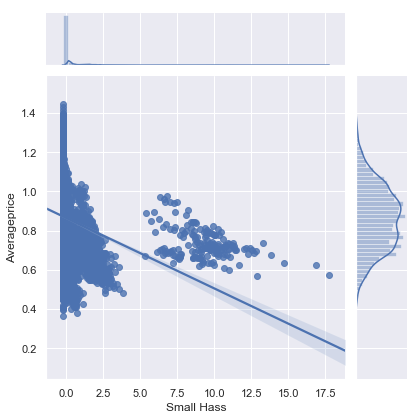

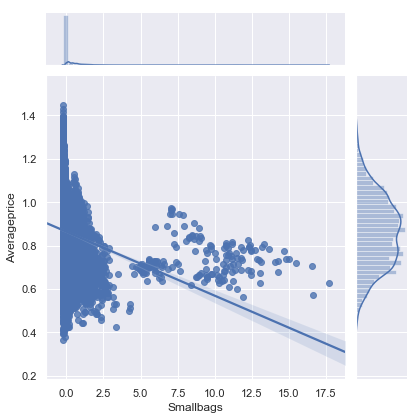

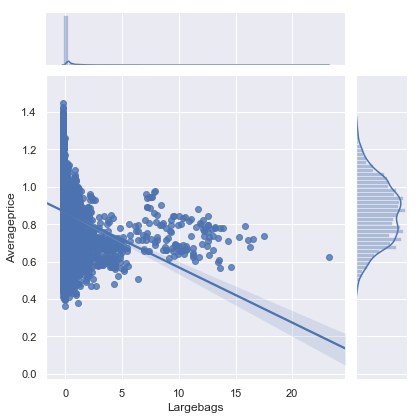

In [46]:
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="Averageprice", data=F_DF, kind="reg");
sns.jointplot(x="Smallbags", y="Averageprice", data=F_DF, kind="reg");
sns.jointplot(x="Largebags", y="Averageprice", data=F_DF, kind="reg");

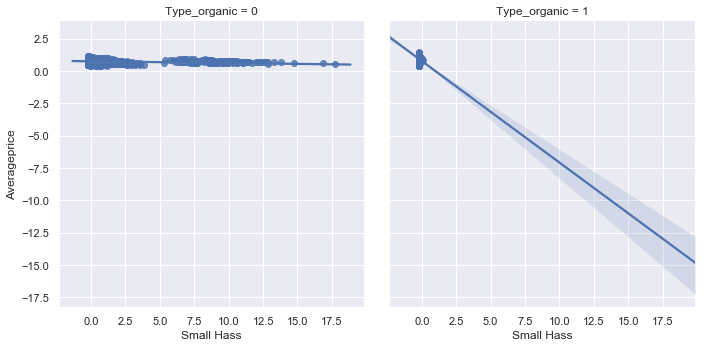

In [47]:
sns.lmplot(x="Small Hass", y="Averageprice", col="Type_organic", data=F_DF, col_wrap=2);



**Graphs depict that organic avocados have less elasticity to the price, compared to conventional ones.**

# Building ML Models

In [48]:
df=avo_data.copy()#Creating a dataframe

**Checking if there are any Null Values in our Data**

In [49]:
df.isnull().values.any() #There are no NULL values in our data

False

In [50]:
pd.isnull(df).sum()>0

Date            False
Averageprice    False
Totalvol        False
Small Hass      False
Large Hass      False
Xlarge Hass     False
Totalbags       False
Smallbags       False
Largebags       False
Xlargebags      False
Type            False
Year            False
Region          False
dtype: bool

**As you can see there are no NULL values in our data**

In [51]:
df['Region'].nunique() #There 54 different Regions in our dataset

54

In [52]:
df['Type'].nunique() #There are 2 types of avocado:Oragnic and Conventional

2

In [53]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [54]:
df.head()

,Date,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Type,Year,Region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex so I decided to drop the entire column. I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day

In [55]:
df_final=pd.get_dummies(df.drop(['Region','Date'],axis=1),drop_first=True) #Dropping the Region and Date column 

In [56]:
df_final.head()

,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Year,Month,Day,Type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [57]:
df_final.tail()

,Averageprice,Totalvol,Small Hass,Large Hass,Xlarge Hass,Totalbags,Smallbags,Largebags,Xlargebags,Year,Month,Day,Type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


**Now our data is ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable**

## Train and Test Split



Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018)

I sorted it by Date and then split it manually (not randomly), to preserve the 'times series effect' on it.

Determined the split ratio as 0.20 which is shown below

In [58]:
X=df_final.iloc[:,1:14]
y=df_final['Averageprice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Implementing Machine Learning Models

1) Linear Regression

2) Decision Tree  

3) Random Forest 

4) KNN 

## 1) Linear Regression Model

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. 

One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print ("R2 of Linear Regression:", lr.score(X_train,y_train) )


R2 of Linear Regression: 0.4402140671575402


### What is R-Squared?

R-squared is a statistical measure of how close the data are to the fitted regression line. 

It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

MAE: 0.23297133291665678
MSE: 0.09108802805350158
RMSE: 0.3018079323899582


### What is RMSE?

The RMSE is the square root of the variance of the residuals. 

It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. 

Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

Lower values of RMSE indicate better fit. 

RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

**Creating a Histogram of Residuals**

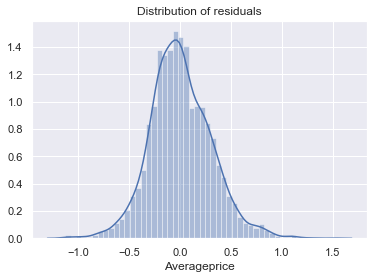

In [61]:
plt.figure(figsize=(6,4))
sns.distplot(y_test - lr.predict(X_test))
plt.title('Distribution of residuals');

### Residuals

The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

Residual = Observed value - Predicted value 
e = y - ŷ

Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

**Creating a Scatter Plot**

Text(0, 0.5, 'Predicted Y')

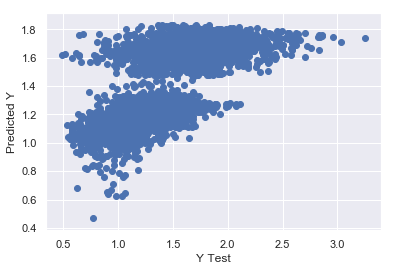

In [62]:
plt.scatter(x=y_test,y=pred_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**As we can see that we dont have a straigt line which means the variables are not much correlated so I am not sure that this is the best model we can apply on our data.**

### What is A Scatter Plot?

Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points. However, they have a very specific purpose. Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

Scatter plots usually consist of a large body of data. The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship.

If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation . If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation 

## 2) DecisionTree 



Decision tree builds regression or classification models in the form of a tree structure. 

In this case we are doing the Regression analysis.

It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 

The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. 

Leaf node represents a decision on the numerical target. 

The topmost decision node in a tree which corresponds to the best predictor called root node. 

Decision trees can handle both categorical and numerical data.

In [63]:
from sklearn.tree import DecisionTreeRegressor 
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_dtr=dtr.predict(X_test)


**Let's plot the Y_test V/s the Predictions**

Text(0, 0.5, 'Predicted Y')

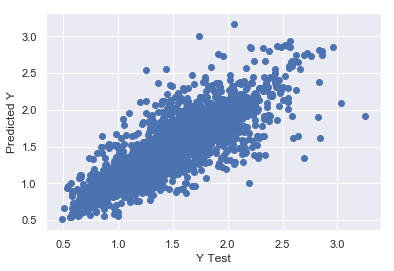

In [64]:
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE.**



In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 0.13448493150684931
MSE: 0.043613178082191784
RMSE: 0.20883768357792082


**Very Nice, our RMSE is lower than the previous one we got with Linear Regression.
Lower the RMSE, better is the model which means Decision Tree works better as compared to Linear Regression**



## 3) Random Forest 

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. 

It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction. 

This is direct consequence of the fact that by maximum voting from a panel of independent judges, we get the final prediction better than the best judge.

It is used for both classification and regression.

In this case we are using the RandomForestRegressor.

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
print(rfr.score(X_train,y_train)) #Gives the R2 of the model

0.9732917939552244


**Checking the RMSE**

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 0.10838630136986302
MSE: 0.024972116712328764
RMSE: 0.15802568371099923


**Let's plot the Y_test V/s the Predictions**

Text(0, 0.5, 'Predicted Y')

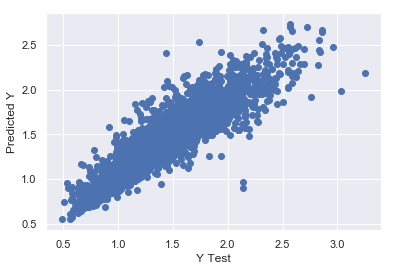

In [68]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**As you can see Random Forest works best for our data set as compared to the other Models. The above plot shows that the Predicted Y and the Test Y are highly correlated and have a linear relationship.**

**Now let's tune the Parameters to check if the accuracy is increased or no**

### Tuning the paramters to get a better accuracy

In [69]:
model_tune_rfr = RandomForestRegressor(n_estimators=13, random_state=3, max_depth=18, min_weight_fraction_leaf=0.0002)
model_tune_rfr.fit(X_train,y_train)
pred_model_tune_rfr = model_tune_rfr.predict(X_test)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_model_tune_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_model_tune_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_model_tune_rfr)))

MAE: 0.10617149235465612
MSE: 0.023449718840761608
RMSE: 0.1531330102909285


**As you can see the RMSE after tuning is slightly better as compared to the model before tuning.**

**Random Forest works better than the previous two models and now let's check our last model i.e KNN**


In [71]:
model_tune_rfr.predict(X_test)[0:5] #print the first 5 predictions of our test set

array([0.92165385, 1.00976923, 1.45580665, 0.90427342, 1.4535067 ])

In [72]:
y_test[0:5]

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
Name: Averageprice, dtype: float64

## 4) KNN 

The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. 

The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In our case we are using k-NN Regression.

In [73]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
pred_Knn=Knn.predict(X_test)



In [74]:
Knn.score(X_train, y_train)  # R2 of the KNN model

0.7811762896153374

**Let's plot the Y_test V/s the Predictions**

Text(0, 0.5, 'Predicted Y')

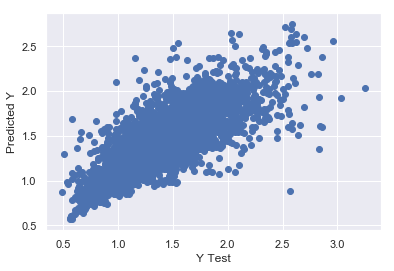

In [75]:
plt.scatter(x=y_test,y=pred_Knn)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Checking the RMSE**

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_Knn))
print('MSE:', metrics.mean_squared_error(y_test, pred_Knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_Knn)))

MAE: 0.17344
MSE: 0.05969066739726027
RMSE: 0.2443167358108328


### Comparing the RMSE for the models used

In [77]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regression Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

# Decision Tree RMSE : 
print('RMSE value of the Desision Tree Model is: ',np.sqrt(metrics.mean_squared_error(y_test, dtr.predict(X_test))))

# Random Forest RMSE :
print('RMSE value of the Random Forest Model is: ',np.sqrt(metrics.mean_squared_error(y_test, model_tune_rfr.predict(X_test))))

#KNN RMSE :
print('RMSE value of the KNN Regressor Model is: ',np.sqrt(metrics.mean_squared_error(y_test, Knn.predict(X_test))))


RMSE value of the Linear Regression Model is:  0.3018079323899582
RMSE value of the Desision Tree Model is:  0.20883768357792082
RMSE value of the Random Forest Model is:  0.1531330102909285
RMSE value of the KNN Regressor Model is:  0.2443167358108328


**As you can see RMSE of the Random Forest Model works best for our data**

### Creating a Histogram of Residuals of the Best Model i.e Random Forest in our case

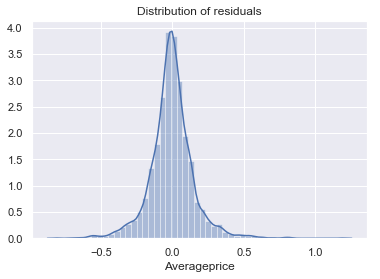

In [78]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot((y_test-pred_model_tune_rfr),bins=50)
plt.title('Distribution of residuals');

**Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.**


**Plotting the Y_test vs Predicted for the best model**

,Y Test,Pred
8604,0.82,0.922
2608,0.97,1.010
14581,1.44,1.456
4254,0.97,0.904
16588,1.45,1.454


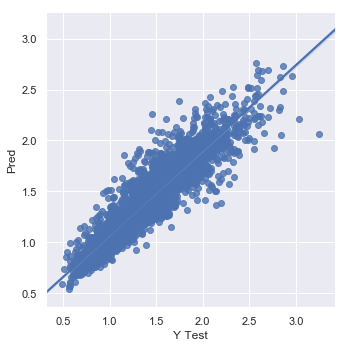

In [79]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred_model_tune_rfr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## ARIMA MODELING

In [80]:
import statsmodels.api as sm # this library will be used for ARIMA and time series analysis
import itertools
from pylab import rcParams # will be used to create time series graph

## Trend Analysis of Average Price

In [81]:
df2 = df[['Date', 'Averageprice']]
df2 = df2.set_index('Date')

In [82]:
df2.sort_index(inplace=True)
df3 = df2.groupby(by=df2.index).sum()
df3.reset_index(inplace=True)

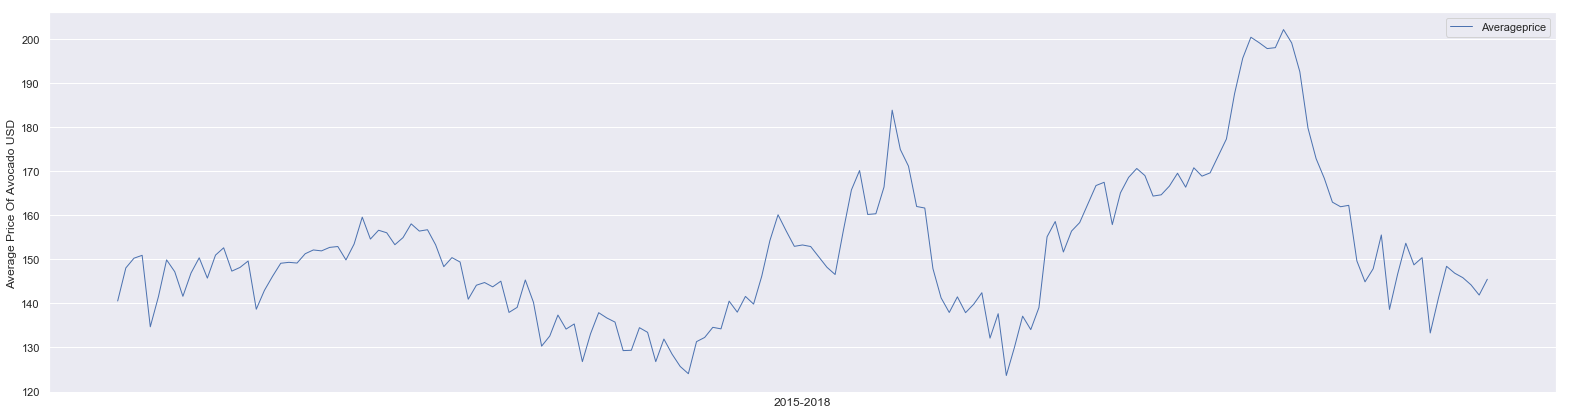

In [83]:
# Plotting the weekly average prices by month;

import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(df3.index,df3['Averageprice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Average Price Of Avocado USD")
plt.legend()
plt.show()

**Some distinguishable patterns appear when we plot the data. The time-series has an increasing trend and a decreasing, and a sharp decrease in price from 2017 onwards.**

**Here we can see there is a downward trend.** 

**We can use statsmodels to perform a decomposition of this time series.**

**The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.**

**With statsmodels we will be able to see the trend, seasonal, and residual components of our data.**


In [84]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [85]:
df3.set_index('Date',inplace=True)

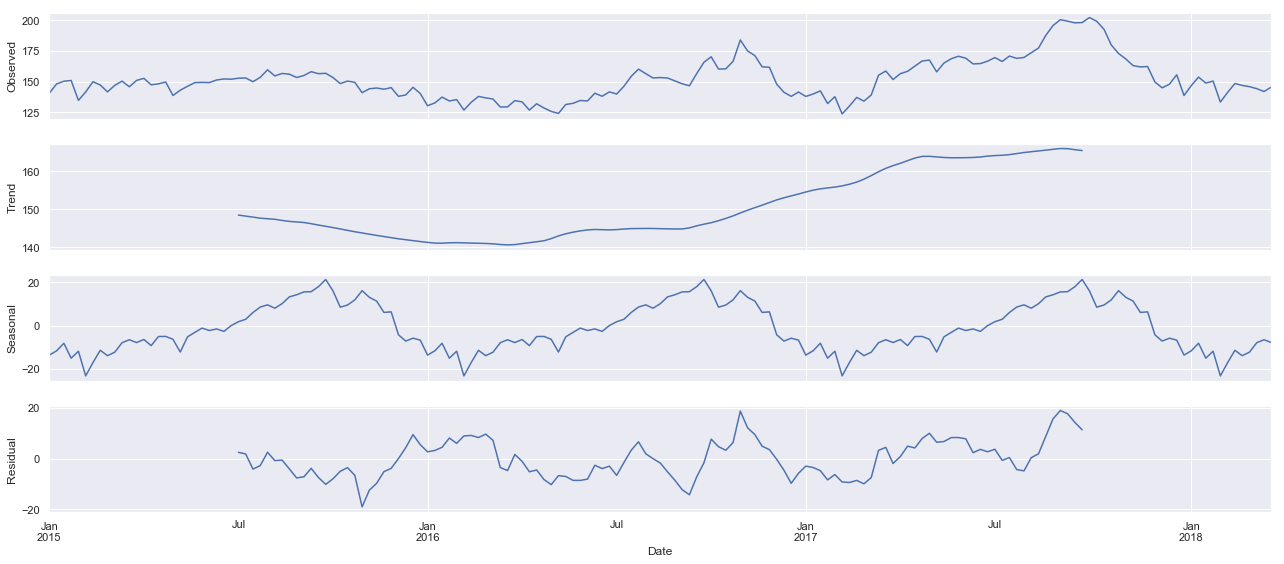

In [86]:
from pylab import rcParams # will be used to create time series graph
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df3, model='additive')
fig = decomposition.plot()
plt.show()


### Insights:

We are using an additive model because the trend is more linear and the seasonality and trend components seem to be constant over time (eg: . A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

Based off the previous chart, it looks like the trend increasing at a higher.We can always experiment with additive versus multiplicative methods.

There appears to be seasonality in the data. It seems The price decreases at the end of the year 2015 and then increases till January 2016 and then marginally decreases till the mid of the year 2016. There is a sudden spike by the end of 2016 and then the prices decrease for the first few months on 2017 and then increases marginally.

One of the possible reasons could be: People are generally out for vacation during during winters so they consume less amount of Avocado as compared to summer where people are working out and eating healthy therefore there is a sharp increase in prices.



## Forecasting the Average Price of 2018 Using ARIMA

Since ARIMA model requires some parameters which need to be fitted. Below Function will tune it for us with respect to AIC

The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

In [87]:

# Initializing parameters 
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


def tune(df,pdq,seasonal):
    result=[]
    for para in pdq:
        for para_seasonal in seasonal:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order=para,
                                                seasonal_order=para_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                result.append(results.aic)
                print('ARIMA{}x{} - AIC:{}'.format(para, para_seasonal, results.aic))
            except:
                continue
    #print('Minimum AIC ',min(result))
    return min(result)
tune(df3,pdq,seasonal)

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2168.475155961216
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1854.6813051814183
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1386.7072027711229
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1254.914942529124
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1396.1343132237023
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1338.4376635891292
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1289.4007307596903
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1256.8307889545954
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1938.14135928325
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1652.6763684016641
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1244.5939281286282
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1111.258929031141
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1260.891187882051
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1189.7082530239113
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1151.220641249606
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1113.2528983329578
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1063.3982748333826
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:984.366581097543
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:11

927.4722270616995

## Fitting the Model based on Parameters Obtained Above

In [88]:
# This function is used to fit ARIMA model on our data.
# Takes input as a dataframe and return the results which is used for prediction

def arima_fit(df):

    mod = sm.tsa.statespace.SARIMAX(df,
                                    order=(0, 1, 1),
                                    seasonal_order=(0, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    return results

results=arima_fit(df3)

## Residual analysis of our fitted model

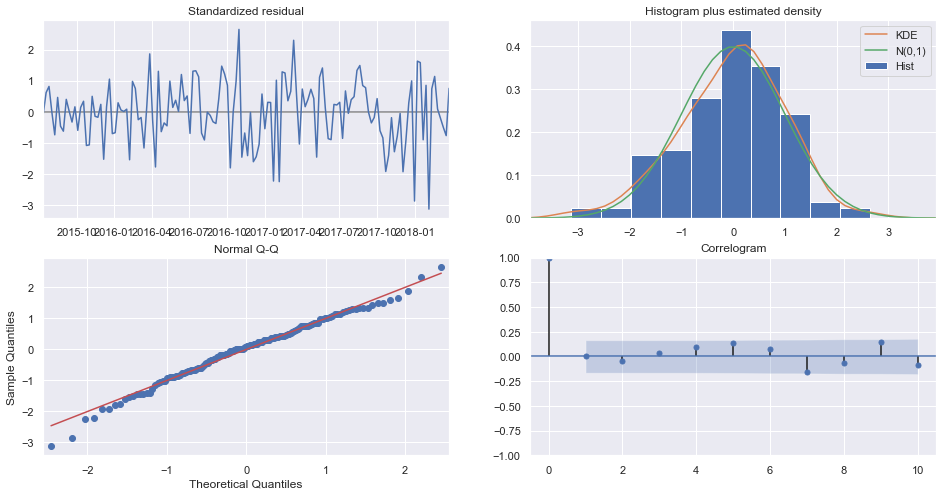

In [89]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Our model diagnostics suggests that the model residuals are near normally distributed.**

In [90]:
df3.tail()

,Averageprice
Date,
2018-02-25,146.84
2018-03-04,145.82
2018-03-11,144.19
2018-03-18,141.88
2018-03-25,145.46


## Forecasting the price for the next 12 weeks

In [91]:
res=results.forecast(steps=12) # next 12 weeks prediction
res

2018-04-01    144.192
2018-04-08    142.598
2018-04-15    142.820
2018-04-22    139.679
2018-04-29    139.993
2018-05-06    143.522
2018-05-13    144.553
2018-05-20    142.610
2018-05-27    142.735
2018-06-03    143.855
2018-06-10    145.754
2018-06-17    145.115
Freq: W-SUN, dtype: float64

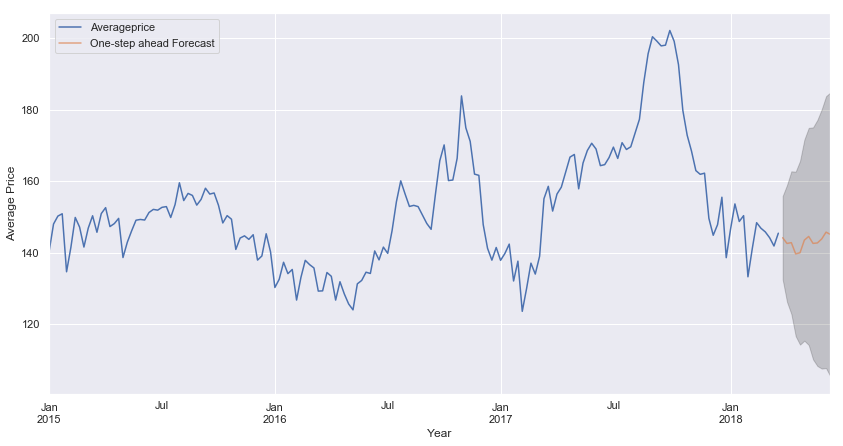

In [92]:
# This function will be used to forecast. It takes input as the result and start, end dates

def forecast(results,start='2018-04-01',end="2018-06-17"):
    pred = results.get_prediction(start=start,end=end, dynamic=False)
    pred_ci = pred.conf_int()
    ax = df3['2015':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    plt.legend()
    plt.show()
    
forecast(results)

**As you can see from the forecast for the next 12 weeks, the prices first slightly decrease and the increases gradually in the next few weeks.**

**Even if our analysis will be on 2016-17, the pattern will remain the same since the overall trend will remain the same.**

# CONCLUSION:

### The Features which are highly correlated to each other are:

1) Small Hass and Total Volume (0.98)

2) Total Bags and Totoal Volume (0.96)

3) Small Bags and Total Bags (0.99)

### The Features which are highly correlated to the Average Price are:

1) Small Hass

2) Small Bags

3) Large Bags

### Based on the Box-Whisker Plot we conclude the average price of Organic Avocado is more as compared to Conventional Avocado.

### When we analyse the results, due to the RMSE values we see that Random forest works best on the given datatset.

### The model can be applied on additional datasets to evaluate its performance.

### We can increase the sample size of the dataset as this can increase the accuracy of estimation.

###  Arima model predicted that the price would increase for the next 12 weeks.

### For future work we can add some explanatory variables which affect the average price of Avocado, eg: season of the year.